<a href="https://colab.research.google.com/github/rajeshmore1/Patent-Project/blob/main/sentance_similarity_by_PATENTSBERTa_using_sentance_embending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install sentence_transformers pandas torch
! pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=09935959f9cffc2dd7b6b28d6ce6efe35ca53aa94f5a5d6bb7755324188de3ae
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [3]:
#Install necessary packages
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from torch.utils.data import DataLoader

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load your dataset
patent_dataset = pd.read_csv("/content/drive/MyDrive/BERT/patents_data000000000000.csv",encoding="unicode_escape",on_bad_lines="skip")

In [6]:
#Delete unwanted column
patent_dataset = patent_dataset.drop(["date"],axis=1)

In [7]:
#Code to convert cpc_id labels into columns in the dataset.
patents_data = pd.concat([patent_dataset.drop('cpc_ids', axis=1), patent_dataset['cpc_ids'].str.get_dummies(sep=",")], axis=1)
patents_data

,id,text,A01B,A01C,A01D,A01F,A01G,A01H,A01J,A01K,...,Y02B,Y02C,Y02D,Y02E,Y02P,Y02T,Y02W,Y04S,Y10S,Y10T
0,8562847,1. A production method of a hydrogen productio...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,8386895,1. A method comprising: storing states in one ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8550451,"1. An image-forming apparatus, comprising: a b...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8405253,1. A system for coupling with a first eService...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8438219,"1. A system, for generating a web page portal ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55481,8599070,1. A first node in a wireless communication sy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55482,8582386,"1. An internal voltage generator circuit, comp...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55483,8583661,1. A route searching apparatus capable of usin...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55484,8501083,1. A quench ring for ejecting quenchant onto a...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Load the pre-trained PatentSBERTa model for sentance embending
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [9]:
# Extract the 'text' column from dataset
texts = patents_data['text'].tolist()

# Encode the texts to obtain sentence embeddings
sentence_embeddings = model.encode(texts)

In [10]:
# take example for finding similar sentences
query_text = "A data processing system for modifying a query during compilation of the query, the query comprising a request for an element of data from a table in a database and parameters identifying the requested element, the data processing system comprising: a computer executing data processing, the computer comprising: an external system interface which: wherein based on determining that the external system does not know the requested data classification and the query associated classification, the suggested action comprises a request to call the external system again at execution time of the query for the requested data classification and the query associated classification, and wherein the external system is external to the computer and manages assignment of classifications to users and sections of data in the table."

# Encode the example text
query_embedding = model.encode(query_text)

In [11]:
# Use cosine similarity to find the most similar sentences
cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

In [12]:
# Create a DataFrame with 'id', 'text', and 'similarity_score' columns
result_df = pd.DataFrame({
    'id': patents_data['id'],
    'text': texts,
    'similarity_score': cosine_scores.tolist()
})

# Sort the DataFrame by similarity scores in descending order
result_df = result_df.sort_values(by='similarity_score', ascending=False)

#gives as output if example mathes 90% with dataset sentances
result_df['prediction'] = (result_df['similarity_score'] > 0.9).astype(int)

In [54]:
# Print the top 10 similar sentences from dataset wich is similar to example
top_n = 10
for i in range(top_n):# Create a DataFrame with 'id', 'text', and 'similarity_score' columns
    print(f"Similarity Score: {result_df['similarity_score'].iloc[i]:.4f}")
    print(f"ID: {result_df['id'].iloc[i]}, Text: {result_df['text'].iloc[i]}")
    print("Prediction:", result_df['prediction'].iloc[i])
    print()

Similarity Score: 0.9880
ID: 8577906, Text: 1. A data processing system for modifying a query during compilation of the query, the query comprising a request for an element of data from a table in a database and parameters identifying the requested element, the data processing system comprising: a computer executing data processing, the computer comprising: an external system interface which: wherein based on determining that the external system does not know the requested data classification and the query associated classification, the suggested action comprises a request to call the external system again at execution time of the query for the requested data classification and the query associated classification, and wherein the external system is external to the computer and manages assignment of classifications to users and sections of data in the table.
Prediction: 1

Similarity Score: 0.8224
ID: 8416666, Text: 1. A data processing system, the data processing system comprising: a d

In [14]:
result_df

,id,text,similarity_score,prediction
500,8577906,1. A data processing system for modifying a qu...,0.987955,1
34376,8416666,"1. A data processing system, the data processi...",0.822428,0
14873,8402348,"1. A data processing system, the system compri...",0.804161,0
13731,8525707,"1. A data processing system, the data processi...",0.801636,0
39009,8522120,"1. A data processing system, the system compri...",0.785829,0
...,...,...,...,...
7887,8501967,1. Î²-Aminoketone sulfonates of the formula wh...,0.122170,0
806,8357314,1. A dielectric elastomer composition comprisi...,0.116807,0
14590,8394958,1. 5-{[1-(2-Chloro-3-fluoro-4-methoxyphenyl)-3...,0.115807,0
12334,8580731,"1. An insulin-gold nanocluster, comprising: a ...",0.112712,0


In [15]:
#Dropping unwanted columns before concatatination.
result_df=result_df.drop(["id","text"],axis=1)

In [16]:
#concatination of output patents with original dataframe for comparision and text classification.
result = pd.concat([result_df, patent_dataset], axis=1, join='inner')
result

,similarity_score,prediction,cpc_ids,id,text
500,0.987955,1,G06F,8577906,1. A data processing system for modifying a qu...
34376,0.822428,0,G11B,8416666,"1. A data processing system, the data processi..."
14873,0.804161,0,"G06F,H03M",8402348,"1. A data processing system, the system compri..."
13731,0.801636,0,H03M,8525707,"1. A data processing system, the data processi..."
39009,0.785829,0,H03M,8522120,"1. A data processing system, the system compri..."
...,...,...,...,...,...
7887,0.122170,0,"C07B,C07C",8501967,1. Î²-Aminoketone sulfonates of the formula wh...
806,0.116807,0,"C08K,C08L,H01B",8357314,1. A dielectric elastomer composition comprisi...
14590,0.115807,0,"A61P,C07C,C07D",8394958,1. 5-{[1-(2-Chloro-3-fluoro-4-methoxyphenyl)-3...
12334,0.112712,0,"A61K,A61P,B82Y,C07K",8580731,"1. An insulin-gold nanocluster, comprising: a ..."


In [17]:
df_claim_cpc_result = result
df_claim_cpc_result.head()

,similarity_score,prediction,cpc_ids,id,text
500,0.987955,1,G06F,8577906,1. A data processing system for modifying a qu...
34376,0.822428,0,G11B,8416666,"1. A data processing system, the data processi..."
14873,0.804161,0,"G06F,H03M",8402348,"1. A data processing system, the system compri..."
13731,0.801636,0,H03M,8525707,"1. A data processing system, the data processi..."
39009,0.785829,0,H03M,8522120,"1. A data processing system, the system compri..."


In [18]:
df_claim_cpc_result=df_claim_cpc_result[["id","cpc_ids","text","similarity_score"]]
df_claim_cpc_result

,id,cpc_ids,text,similarity_score
500,8577906,G06F,1. A data processing system for modifying a qu...,0.987955
34376,8416666,G11B,"1. A data processing system, the data processi...",0.822428
14873,8402348,"G06F,H03M","1. A data processing system, the system compri...",0.804161
13731,8525707,H03M,"1. A data processing system, the data processi...",0.801636
39009,8522120,H03M,"1. A data processing system, the system compri...",0.785829
...,...,...,...,...
7887,8501967,"C07B,C07C",1. Î²-Aminoketone sulfonates of the formula wh...,0.122170
806,8357314,"C08K,C08L,H01B",1. A dielectric elastomer composition comprisi...,0.116807
14590,8394958,"A61P,C07C,C07D",1. 5-{[1-(2-Chloro-3-fluoro-4-methoxyphenyl)-3...,0.115807
12334,8580731,"A61K,A61P,B82Y,C07K","1. An insulin-gold nanocluster, comprising: a ...",0.112712


In [19]:
df_claim_cpc_result['cpc_ids'] = df_claim_cpc_result['cpc_ids'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")

<ipython-input-19-f8d129941de4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_claim_cpc_result['cpc_ids'] = df_claim_cpc_result['cpc_ids'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")
<ipython-input-19-f8d129941de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_cpc_result['cpc_ids'] = df_claim_cpc_result['cpc_ids'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")


In [58]:
k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])
k_similar_patents
final_result_mod = k_similar_patents.mode()
print('Prediction for section_id of New Patent is: ', final_result_mod.iloc[0]['cpc_ids'])
print(k_similar_patents.iloc[0:10][["id",'cpc_ids',"similarity_score","text"]])
k_similar_patents

Prediction for section_id of New Patent is:  G06F
            id    cpc_ids  similarity_score  \
500    8577906       G06F          0.987955   
34376  8416666       G11B          0.822428   
14873  8402348  H03M,G06F          0.804161   
13731  8525707       H03M          0.801636   
39009  8522120       H03M          0.785829   
32259  8498073       G11B          0.784012   
1825   8578253  G11B,H03M          0.758183   
40256  8570556       H04N          0.754805   
986    8402001       G06F          0.750503   
36379  8346815       G06F          0.748408   

                                                    text  
500    1. A data processing system for modifying a qu...  
34376  1. A data processing system, the data processi...  
14873  1. A data processing system, the system compri...  
13731  1. A data processing system, the data processi...  
39009  1. A data processing system, the system compri...  
32259  1. A data processing system, the system compri...  
1825   1. A data pr

,id,cpc_ids,text,similarity_score
500,8577906,G06F,1. A data processing system for modifying a qu...,0.987955
34376,8416666,G11B,"1. A data processing system, the data processi...",0.822428
14873,8402348,"H03M,G06F","1. A data processing system, the system compri...",0.804161
13731,8525707,H03M,"1. A data processing system, the data processi...",0.801636
39009,8522120,H03M,"1. A data processing system, the system compri...",0.785829
32259,8498073,G11B,"1. A data processing system, the system compri...",0.784012
1825,8578253,"G11B,H03M","1. A data processing circuit, the system compr...",0.758183
40256,8570556,H04N,1. An image processing system to perform image...,0.754805
986,8402001,G06F,1. A system comprising: a query processor for ...,0.750503
36379,8346815,G06F,1. A system comprising: a data processing appa...,0.748408


In [55]:
final_result_mod

,id,cpc_ids,text,similarity_score
0,8346815,G06F,"1. A data processing circuit, the system compr...",0.748408
1,8402001,NaN,1. A data processing system for modifying a qu...,0.750503
2,8402348,NaN,"1. A data processing system, the data processi...",0.754805
3,8416666,NaN,"1. A data processing system, the data processi...",0.758183
4,8498073,NaN,"1. A data processing system, the system compri...",0.784012
5,8522120,NaN,"1. A data processing system, the system compri...",0.785829
6,8525707,NaN,"1. A data processing system, the system compri...",0.801636
7,8570556,NaN,1. A system comprising: a data processing appa...,0.804161
8,8577906,NaN,1. A system comprising: a query processor for ...,0.822428
9,8578253,NaN,1. An image processing system to perform image...,0.987955


## **Sentance Similarity**
Above notebook give us similar texts that are matched in our dataset with there similarity score by using Patentsberta sentance transformer.
we use sentance embending to convert text into vector and then use that vector for finding sentance similarity.

If we pass any text to the model it gives mathes from dataset


## **visualisation of results**

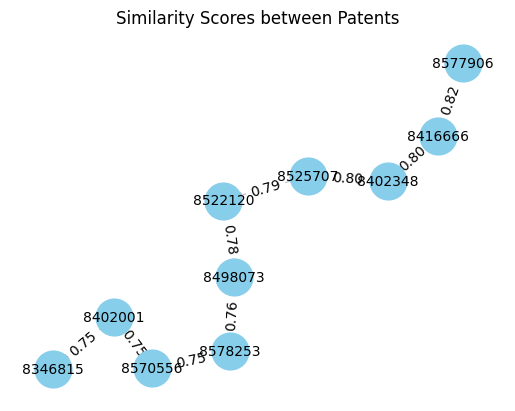

In [21]:
#networkx library for Force directed layout.
import networkx as nx
import matplotlib.pyplot as plt

#k_similar_patents is a DataFrame with columns "id", "cpc_ids", "similarity_score", "text"
k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])

# Create a directed graph
G = nx.DiGraph()

# Adding nodes and edges based on similarity scores
for i in range(len(k_similar_patents)):
    patent_id = k_similar_patents.iloc[i]['id']
    cpc_id = k_similar_patents.iloc[i]['cpc_ids']
    similarity_score = k_similar_patents.iloc[i]['similarity_score']
    #plot to show final visuals
    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # Connect nodes with directed edges based on similarity score
    if i > 0:
        previous_patent_id = k_similar_patents.iloc[i - 1]['id']
        G.add_edge(previous_patent_id, patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Similarity Scores between Patents")
plt.axis("off")
plt.show()

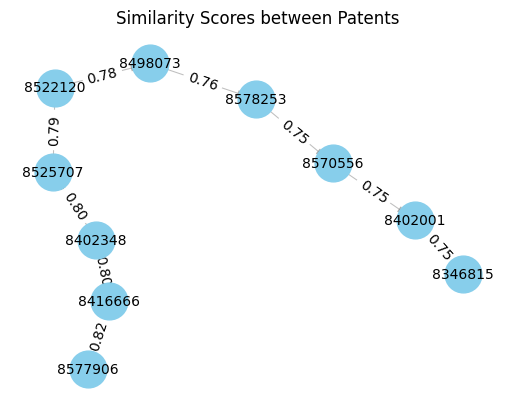

'\nAfter running this script, the plt.show() command will display the resulting graph.\nThe positions of nodes in the visualization are determined\nby the force-directed layout algorithm and will likely change each time you run\nthe script due to the random initialization of node\xa0positions.\n'

In [22]:
"""
this plot is showing similarity score between two ids of the top 10 score of the output.
showing the avg similarity score between two consecutive ids from output dataframe
"""
#networkx library for Force directed layout.
#networkx for creating and manipulating graphs
import networkx as nx
import matplotlib.pyplot as plt

#This line selects the top 10 records with the highest similarity scores from the DataFrame df_claim_cpc_result.
k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])

# This line initializes an empty directed graph (DiGraph) using the NetworkX library.
G = nx.DiGraph()

# Adding nodes and edges based on similarity scores
"""
This loop iterates over the top 10 records in k_similar_patents and adds nodes and edges to the graph
based on the patent information and similarity scores.Each node is labeled with information
about the patent, including its ID, CPC ID, and similarity score. Edges are added between consecutive patents
in the sorted list based on their similarity scores.
"""
for i in range(len(k_similar_patents)):
    patent_id = k_similar_patents.iloc[i]['id']
    cpc_id = k_similar_patents.iloc[i]['cpc_ids']
    similarity_score = k_similar_patents.iloc[i]['similarity_score']
    #plot to show final visuals
    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # Connect nodes with directed edges based on similarity score
    if i > 0:
        previous_patent_id = k_similar_patents.iloc[i - 1]['id']
        G.add_edge(previous_patent_id, patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
"""
It generates positions of nodes using the force-directed layout algorithm (spring_layout)
provided by NetworkX. The pos variable now contains the 2D coordinates of each node.

"""
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
"""
These lines use the networkx drawing functions to visualize the nodes, edges, and labels
based on the generated layout (pos). Nodes are drawn with a size of 700, colored sky blue

"""
#These lines add labels to the edges, displaying their weights (similarity scores) on the graph.
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Similarity Scores between Patents")
plt.axis("off")
plt.show()
"""
After running this script, the plt.show() command will display the resulting graph.
The positions of nodes in the visualization are determined
by the force-directed layout algorithm and will likely change each time you run
the script due to the random initialization of node positions.
"""

1] Nodes are created for each patent using the patent_id as the node identifier. Edges are created from the "cpc_ids" node to each patent node with weights based on similarity scores.

2]In the first code snippet, nodes are created for each patent, and there is a special node "cpc_ids" from which edges originate.

3]The first code snippet represents a graph where patents are connected to a special "cpc_ids" node.

4]The first code snippet seems to focus on the relationship between a general "cpc_ids" category and individual patents.

**5]A Directed Acyclic Graph (DAG) is a graph structure that consists of nodes (vertices) and directed edges. In a DAG, edges have a direction, meaning they go from one node to another, and there are no cycles, which means you cannot traverse a sequence of edges and return to the starting node. In other words, you can't have a closed loop in a DAG.**


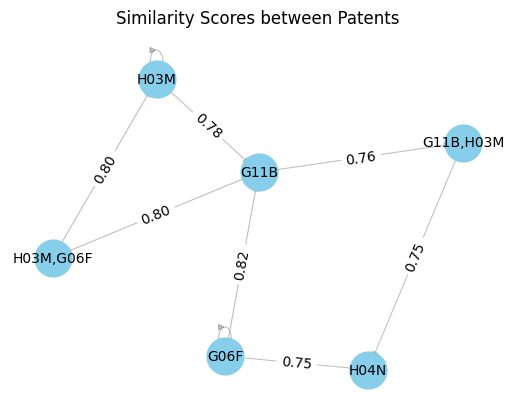

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming k_similar_patents is a DataFrame with columns "id", "cpc_ids", "similarity_score", "text"
k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(k_similar_patents)):
    patent_id = k_similar_patents.iloc[i]['id']
    cpc_id = k_similar_patents.iloc[i]['cpc_ids']
    similarity_score = k_similar_patents.iloc[i]['similarity_score']

    G.add_node(cpc_id, label=f"Patent {cpc_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")
    #creating a directed acyclic graph (DAG) where nodes represent patents and edges represent the
    #relationships between patents based on their similarity scores.

    # Connect nodes with directed edges based on similarity score
    if i > 0:
        previous_cpc_id = k_similar_patents.iloc[i - 1]['cpc_ids']
        G.add_edge(previous_cpc_id, cpc_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.title("Similarity Scores between Patents")
plt.axis("off")
plt.show()

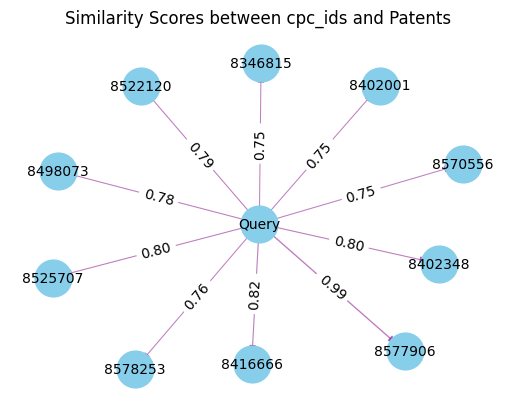

In [24]:


# Assuming df_claim_cpc_result is your DataFrame with columns "id", "cpc_ids", "similarity_score", "text"
k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])

# Extracting necessary columns for visualization
data = k_similar_patents[['id', 'cpc_ids', 'similarity_score', 'text']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(data)):
    patent_id = data.iloc[i]['id']
    cpc_id = data.iloc[i]['cpc_ids']
    similarity_score = data.iloc[i]['similarity_score']
    sentence = data.iloc[i]['text']

    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="purple", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()

1]Nodes are created for each CPC (Common Patent Classification) code using the cpc_id as the node identifier.
Edges are created between consecutive CPC nodes based on similarity scores.

2]In the second code snippet, nodes represent CPC codes, and edges connect consecutive CPC nodes.

3]The second code snippet represents a directed acyclic graph (DAG) where nodes represent CPC codes, and edges connect consecutive CPC codes based on similarity scores.

4]The second code snippet seems to focus on representing a sequence or hierarchy of CPC codes based on similarity scores between consecutive codes.

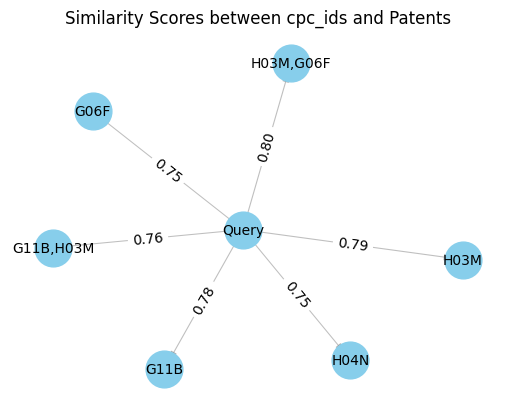

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Assuming df_claim_cpc_result is your DataFrame with columns "id", "cpc_ids", "similarity_score", "text"
k_similar_patents = df_claim_cpc_result.nlargest(10, ['similarity_score'])

# Extracting necessary columns for visualization
data = k_similar_patents[['id', 'cpc_ids', 'similarity_score', 'text']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(data)):
    patent_id = data.iloc[i]['id']
    cpc_id = data.iloc[i]['cpc_ids']
    similarity_score = data.iloc[i]['similarity_score']
    sentence = data.iloc[i]['text']

    G.add_node(cpc_id, label=f"Patent {cpc_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",cpc_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()

# Save and Load The Embeddings For Pediction

In [30]:
# Save the DataFrame to a file (e.g., in pickle format)
import numpy as np
from sentence_transformers import SentenceTransformer, util
import os
# Load the pre-trained PatentSBERTa model
#model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

# Extract the 'text' column from your dataset
#texts = patents_data['text'].tolist()

# Encode the texts to obtain sentence embeddings
#sentence_embeddings = model.encode(texts)
embeddings_file = '/content/drive/MyDrive/BERT/sentence_embeddings.npy'


if not os.path.exists(embeddings_file):
    # Encode the texts to obtain sentence embeddings
    #sentence_embeddings = model.encode(texts)

    # Save all embeddings to a file
    np.save(embeddings_file, sentence_embeddings)
else:
    # Load embeddings from the file
    sentence_embeddings = np.load(embeddings_file)

In [31]:
sentence_embeddings = np.load(embeddings_file)

In [32]:
sentence_embeddings

array([[-0.09440162, -0.6962118 , -0.13801108, ..., -0.16357753,
        -0.28738907, -0.23627593],
       [ 0.03404239, -0.4190378 , -0.13017948, ...,  0.05230338,
         0.05503498, -0.14406678],
       [-0.02420015, -0.79769397, -0.05067094, ..., -0.17807046,
         0.12482113, -0.03536322],
       ...,
       [ 0.14897437, -0.38988695, -0.07388863, ..., -0.03309129,
        -0.10534913, -0.2889216 ],
       [ 0.17407046, -0.61734504, -0.04308033, ..., -0.00144884,
        -0.12683101, -0.3281009 ],
       [ 0.14460981, -0.43052283, -0.02774319, ..., -0.08573301,
        -0.34982142, -0.24356018]], dtype=float32)

In [33]:
# take example for finding similar sentences
query_text = "A data processing system for modifying a query during compilation of the query, the query comprising a request for an element of data from a table in a database and parameters identifying the requested element, the data processing system comprising: a computer executing data processing, the computer comprising: an external system interface which: wherein based on determining that the external system does not know the requested data classification and the query associated classification, the suggested action comprises a request to call the external system again at execution time of the query for the requested data classification and the query associated classification, and wherein the external system is external to the computer and manages assignment of classifications to users and sections of data in the table."

# Encode the example text
query_embedding = model.encode(query_text)

In [34]:
# Use cosine similarity to find the most similar sentences
cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

In [47]:

# Create a DataFrame with 'id', 'text', and 'similarity_score' columns
result_df = pd.DataFrame({
    'id': patent_dataset['id'],
    'text': texts,
    'cpc_ids': patent_dataset['cpc_ids'],
    'similarity_score': cosine_scores.tolist()
})

# Sort the DataFrame by similarity scores in descending order
result_df= result_df.sort_values(by='similarity_score', ascending=False)

#gives 1 as output if example mathes 90% with dataset sentances otherwise 0
result_df['prediction'] = (result_df['similarity_score'] > 0.9).astype(int)

In [48]:
# Print the top 10 similar sentences from dataset wich is similar to example
top_n = 10
for i in range(top_n):
    print(f"Similarity Score: {result_df['similarity_score'].iloc[i]:.4f}")
    print(f"ID: {result_df['id'].iloc[i]}, Text: {result_df['text'].iloc[i]}\n")
    print("Prediction:", result_df['prediction'].iloc[i])

Similarity Score: 0.9880
ID: 8577906, Text: 1. A data processing system for modifying a query during compilation of the query, the query comprising a request for an element of data from a table in a database and parameters identifying the requested element, the data processing system comprising: a computer executing data processing, the computer comprising: an external system interface which: wherein based on determining that the external system does not know the requested data classification and the query associated classification, the suggested action comprises a request to call the external system again at execution time of the query for the requested data classification and the query associated classification, and wherein the external system is external to the computer and manages assignment of classifications to users and sections of data in the table.

Prediction: 1
Similarity Score: 0.8224
ID: 8416666, Text: 1. A data processing system, the data processing system comprising: a d

In [50]:
final_result_df = result_df.nlargest(10,['similarity_score'])

In [51]:
final_result_df

,id,text,cpc_ids,similarity_score,prediction
500,8577906,1. A data processing system for modifying a qu...,G06F,0.987955,1
34376,8416666,"1. A data processing system, the data processi...",G11B,0.822428,0
14873,8402348,"1. A data processing system, the system compri...","G06F,H03M",0.804161,0
13731,8525707,"1. A data processing system, the data processi...",H03M,0.801636,0
39009,8522120,"1. A data processing system, the system compri...",H03M,0.785829,0
32259,8498073,"1. A data processing system, the system compri...",G11B,0.784012,0
1825,8578253,"1. A data processing circuit, the system compr...","G11B,H03M",0.758183,0
40256,8570556,1. An image processing system to perform image...,H04N,0.754805,0
986,8402001,1. A system comprising: a query processor for ...,G06F,0.750503,0
36379,8346815,1. A system comprising: a data processing appa...,G06F,0.748408,0


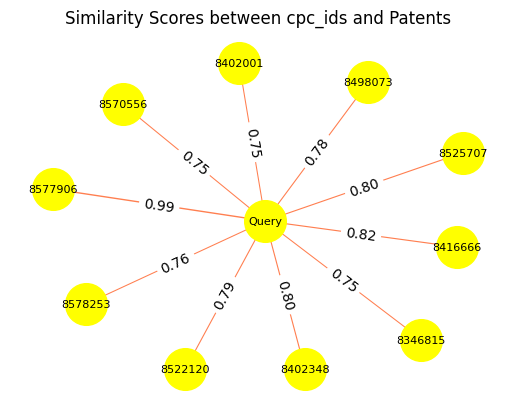

In [60]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(final_result_df)):
    patent_id = final_result_df.iloc[i]['id']
    cpc_id = final_result_df.iloc[i]['cpc_ids']
    similarity_score = final_result_df.iloc[i]['similarity_score']
    sentence = final_result_df.iloc[i]['text']

    G.add_node(patent_id, label=f"Patent {patent_id}\nCPC {cpc_id}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",patent_id, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=900, node_color="yellow")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="coral", alpha=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()